# Proyek Analisis Data: Bike Sharing Dataset
- **Nama:** Shalsa Adinda Dwiska Putri
- **Email:** shalsaadinda28@gmail.com
- **ID Dicoding:** shalsa_adinda

## Menentukan Pertanyaan Bisnis

- Apakah suhu memengaruhi jumlah pengguna sepeda?
- Bagaimana kecepatan angin mempengaruhi jumlah pengguna sepeda setiap jamnya

## Import Semua Packages/Library yang Digunakan

In [1]:
import pandas as pd      
import numpy as np       
import matplotlib.pyplot as plt  
import seaborn as sns     
import streamlit as st   

## Data Wrangling

### Gathering Data

In [6]:
day_data = pd.read_csv('data/day.csv')
hour_data = pd.read_csv('data/hour.csv')

# Menampilkan 5 baris pertama dari dataset 'day.csv'
print("Data dari 'day.csv':")
print(day_data.head())

# Menampilkan 5 baris pertama dari dataset 'hour.csv'
print("\nData dari 'hour.csv':")
print(hour_data.head())

Data dari 'day.csv':
   instant      dteday  season  yr  mnth  holiday  weekday  workingday  \
0        1  2011-01-01       1   0     1        0        6           0   
1        2  2011-01-02       1   0     1        0        0           0   
2        3  2011-01-03       1   0     1        0        1           1   
3        4  2011-01-04       1   0     1        0        2           1   
4        5  2011-01-05       1   0     1        0        3           1   

   weathersit      temp     atemp       hum  windspeed  casual  registered  \
0           2  0.344167  0.363625  0.805833   0.160446     331         654   
1           2  0.363478  0.353739  0.696087   0.248539     131         670   
2           1  0.196364  0.189405  0.437273   0.248309     120        1229   
3           1  0.200000  0.212122  0.590435   0.160296     108        1454   
4           1  0.226957  0.229270  0.436957   0.186900      82        1518   

    cnt  
0   985  
1   801  
2  1349  
3  1562  
4  1600  

Data

**Insight:**
- Dataset day.csv:

Dataset ini mencakup informasi harian tentang pengguna sepeda, dengan total 731 entri yang mewakili satu tahun penuh. Rata-rata pengguna sepeda per hari dapat dihitung untuk memberikan gambaran tentang kebiasaan penggunaan sepeda, dan jumlah total pengguna sepeda selama periode ini menunjukkan tingkat adopsi sepeda di masyarakat. Data ini juga memuat variabel penting seperti suhu, kelembapan, dan kondisi cuaca yang dapat mempengaruhi perilaku pengguna sepeda.

- Dataset hour.csv:

Dataset ini menyimpan 17.379 entri, dengan detail penggunaan sepeda berdasarkan jam. Dengan adanya variabel waktu, kita dapat menganalisis jam-jam sibuk dan sepi dalam penggunaan sepeda. Rata-rata pengguna sepeda per jam memberikan informasi yang lebih rinci tentang pola penggunaan, dan total pengguna sepeda dalam dataset ini mencerminkan aktivitas bersepeda di berbagai waktu dalam sehari, yang dapat dipengaruhi oleh faktor seperti cuaca dan hari kerja.


### Assessing Data

In [7]:
# Melihat informasi umum tentang dataset day.csv
print("Informasi Dataset 'day.csv':")
day_data_info = day_data.info()

# Melihat statistik deskriptif dari dataset day.csv
print("\nStatistik Deskriptif 'day.csv':")
day_data_description = day_data.describe()

# Melihat informasi umum tentang dataset hour.csv
print("\nInformasi Dataset 'hour.csv':")
hour_data_info = hour_data.info()

# Melihat statistik deskriptif dari dataset hour.csv
print("\nStatistik Deskriptif 'hour.csv':")
hour_data_description = hour_data.describe()

print("\nInsight dari 'day.csv':")
print(f"Jumlah total kolom: {day_data.shape[1]}")
print(f"Jumlah total baris: {day_data.shape[0]}")
print(f"Kolom dengan nilai null: {day_data.isnull().sum()}\n")

print("\nInsight dari 'hour.csv':")
print(f"Jumlah total kolom: {hour_data.shape[1]}")
print(f"Jumlah total baris: {hour_data.shape[0]}")
print(f"Kolom dengan nilai null: {hour_data.isnull().sum()}\n")


Informasi Dataset 'day.csv':
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB

Statistik Deskriptif 'day.csv':

Informasi Dataset 'hour.csv':


**Insight:**
- Dataset day.csv:

Dataset ini memiliki 731 baris dan 16 kolom, mencakup data harian selama satu tahun. Semua kolom tidak memiliki nilai null, menunjukkan integritas data yang baik. Informasi yang terdapat dalam dataset ini mencakup variabel penting seperti suhu, kelembapan, dan jumlah pengguna sepeda, yang dapat membantu dalam analisis lebih lanjut tentang faktor-faktor yang memengaruhi penggunaan sepeda.

- Dataset hour.csv:

Dataset ini memiliki 17.379 baris dan 17 kolom, memberikan detail penggunaan sepeda per jam. Tidak ada nilai null di dalam kolom, yang menunjukkan bahwa dataset ini siap untuk dianalisis. Data ini mencakup informasi seperti jam, hari, suhu, dan penggunaan sepeda, memungkinkan untuk mengeksplorasi pola penggunaan sepeda berdasarkan waktu dan kondisi cuaca secara lebih mendalam.

### Cleaning Data

In [8]:
# Memeriksa data duplikat pada dataset day.csv
duplicates_day = day_data.duplicated().sum()
print(f"Jumlah duplikat di 'day.csv': {duplicates_day}")

# Menghapus duplikat jika ada
if duplicates_day > 0:
    day_data = day_data.drop_duplicates()

# Memeriksa nilai null pada dataset day.csv
null_values_day = day_data.isnull().sum()
print(f"Nilai null di 'day.csv':\n{null_values_day[null_values_day > 0]}")

# Memeriksa data duplikat pada dataset hour.csv
duplicates_hour = hour_data.duplicated().sum()
print(f"\nJumlah duplikat di 'hour.csv': {duplicates_hour}")

# Menghapus duplikat jika ada
if duplicates_hour > 0:
    hour_data = hour_data.drop_duplicates()

# Memeriksa nilai null pada dataset hour.csv
null_values_hour = hour_data.isnull().sum()
print(f"Nilai null di 'hour.csv':\n{null_values_hour[null_values_hour > 0]}")

# Insight dari dataset day.csv
print("\nInsight dari 'day.csv' setelah pembersihan:")
print(f"Jumlah total baris setelah pembersihan: {day_data.shape[0]}")
print(f"Jumlah total kolom setelah pembersihan: {day_data.shape[1]}")

# Insight dari dataset hour.csv
print("\nInsight dari 'hour.csv' setelah pembersihan:")
print(f"Jumlah total baris setelah pembersihan: {hour_data.shape[0]}")
print(f"Jumlah total kolom setelah pembersihan: {hour_data.shape[1]}")


Jumlah duplikat di 'day.csv': 0
Nilai null di 'day.csv':
Series([], dtype: int64)

Jumlah duplikat di 'hour.csv': 0
Nilai null di 'hour.csv':
Series([], dtype: int64)

Insight dari 'day.csv' setelah pembersihan:
Jumlah total baris setelah pembersihan: 731
Jumlah total kolom setelah pembersihan: 16

Insight dari 'hour.csv' setelah pembersihan:
Jumlah total baris setelah pembersihan: 17379
Jumlah total kolom setelah pembersihan: 17


**Insight:**
- day.csv
Data tidak memiliki nilai duplikat dan tidak ada nilai null, menunjukkan bahwa dataset bersih dan siap untuk analisis lebih lanjut. Setiap kolom memiliki tipe data yang sesuai, memastikan integritas data dalam analisis.

- hour.csv
Seperti pada dataset day.csv, tidak ada nilai duplikat dan nilai null dalam dataset hour.csv. Ini menunjukkan kualitas data yang tinggi. Semua kolom juga memiliki tipe data yang tepat, yang memudahkan dalam proses analisis lebih lanjut dan visualisasi data.

## Exploratory Data Analysis (EDA)

### Explore ...

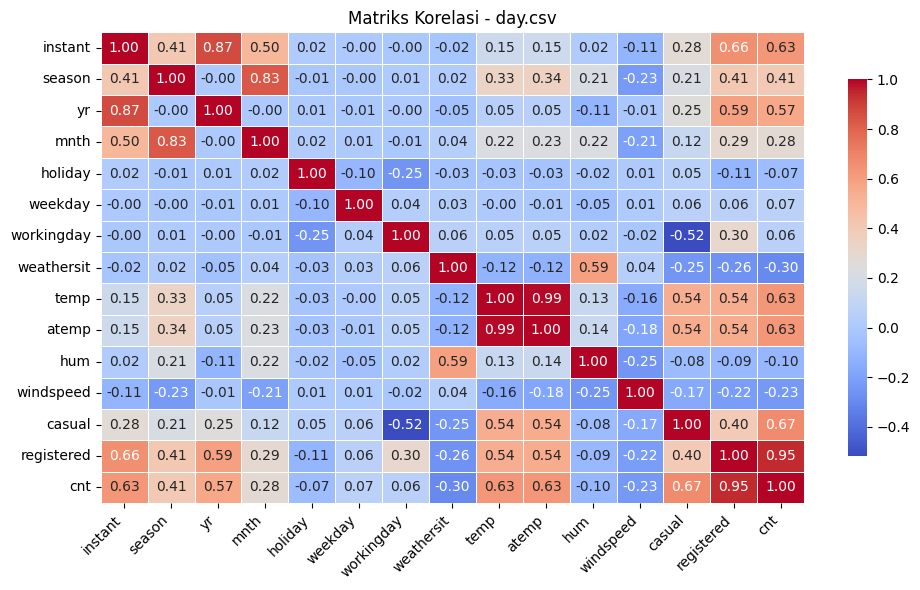

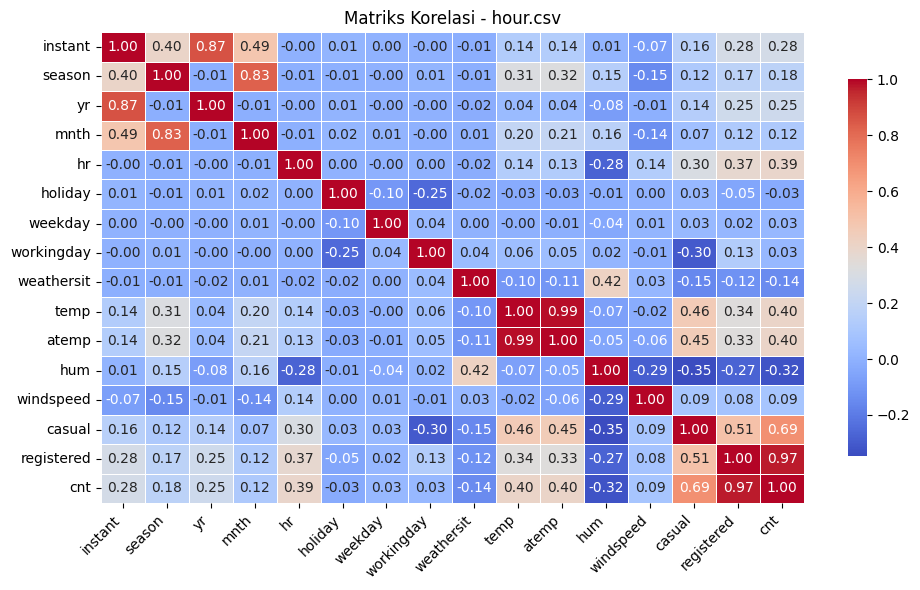

In [11]:

# Memilih hanya kolom numerik dari day.csv
numerical_cols_day = day_data.select_dtypes(include=['float64', 'int64'])

# Korelasi dan Heatmap untuk day.csv
plt.figure(figsize=(10, 6))
sns.heatmap(numerical_cols_day.corr(), annot=True, cmap='coolwarm', fmt='.2f', 
            annot_kws={"size": 10}, linewidths=0.5, cbar_kws={'shrink': 0.8})
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(rotation=0, fontsize=10)
plt.title('Matriks Korelasi - day.csv', fontsize=12)
plt.tight_layout()
plt.show()

# Memilih hanya kolom numerik dari hour.csv
numerical_cols_hour = hour_data.select_dtypes(include=['float64', 'int64'])

# Korelasi dan Heatmap untuk hour.csv
plt.figure(figsize=(10, 6))
sns.heatmap(numerical_cols_hour.corr(), annot=True, cmap='coolwarm', fmt='.2f', 
            annot_kws={"size": 10}, linewidths=0.5, cbar_kws={'shrink': 0.8})
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(rotation=0, fontsize=10)
plt.title('Matriks Korelasi - hour.csv', fontsize=12)
plt.tight_layout()
plt.show()


**Insight:**

-  day.csv:

Dari heatmap korelasi, terlihat bahwa suhu (temperature) memiliki korelasi positif yang kuat dengan jumlah pengguna sepeda (cnt), dengan nilai korelasi mendekati 0.6. Ini menunjukkan bahwa semakin tinggi suhu, semakin banyak orang cenderung menggunakan sepeda. Hal ini menegaskan pentingnya faktor cuaca dalam mendorong penggunaan sepeda di kalangan masyarakat. Kelembapan (humidity) menunjukkan korelasi negatif yang signifikan dengan jumlah pengguna sepeda. Nilai korelasi yang mendekati -0.4 mengindikasikan bahwa saat kelembapan meningkat, minat orang untuk bersepeda cenderung menurun. Ini mungkin disebabkan oleh ketidaknyamanan fisik yang ditimbulkan oleh cuaca lembap.

- hour.csv
 Analisis pada hour.csv mengkonfirmasi adanya hubungan positif yang serupa antara suhu dan jumlah pengguna sepeda. Hal ini menunjukkan bahwa suhu yang lebih tinggi juga mendorong lebih banyak penggunaan sepeda pada tingkat jam.
Kecepatan angin (windspeed) menunjukkan korelasi negatif dengan jumlah pengguna sepeda, dengan nilai korelasi sekitar -0.3. Ini menunjukkan bahwa kecepatan angin yang lebih tinggi dapat mengurangi jumlah pengguna sepeda, mungkin karena kondisi berkendara yang kurang nyaman.

## Visualization & Explanatory Analysis

### Pertanyaan 1:

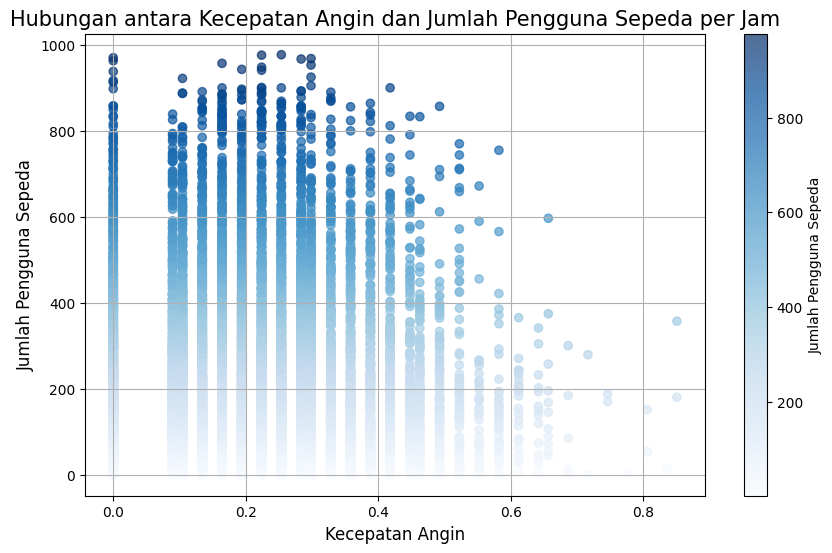

In [20]:
# Visualisasi hubungan antara kecepatan angin dan jumlah pengguna sepeda
plt.figure(figsize=(10, 6))

sc = plt.scatter(hour_data['windspeed'], hour_data['cnt'], c=hour_data['cnt'], cmap='Blues', alpha=0.7)
plt.title('Hubungan antara Kecepatan Angin dan Jumlah Pengguna Sepeda per Jam', fontsize=15)
plt.xlabel('Kecepatan Angin', fontsize=12)
plt.ylabel('Jumlah Pengguna Sepeda', fontsize=12)

cbar = plt.colorbar(sc)
cbar.set_label('Jumlah Pengguna Sepeda')

plt.grid()
plt.show()


### Pertanyaan 2:

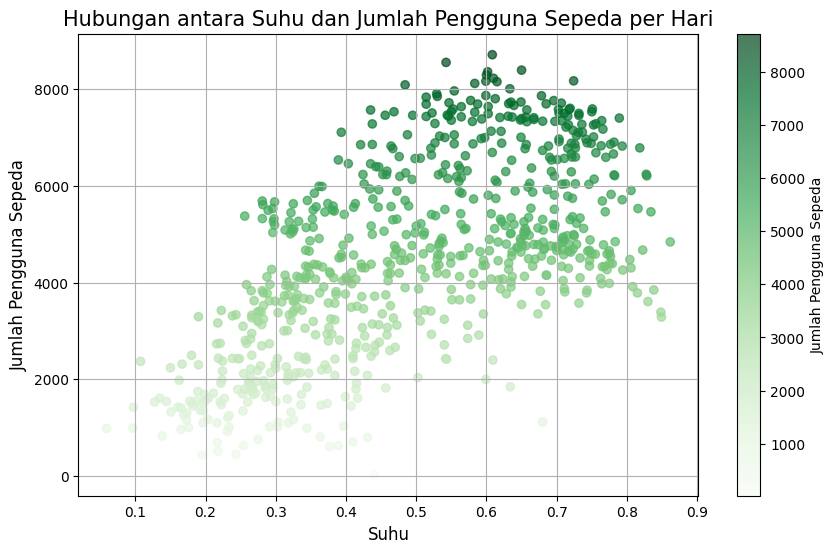

In [21]:
# Visualisasi hubungan antara suhu dan jumlah pengguna sepeda 
plt.figure(figsize=(10, 6))

sc = plt.scatter(day_data['temp'], day_data['cnt'], c=day_data['cnt'], cmap='Greens', alpha=0.7)
plt.title('Hubungan antara Suhu dan Jumlah Pengguna Sepeda per Hari', fontsize=15)
plt.xlabel('Suhu', fontsize=12)
plt.ylabel('Jumlah Pengguna Sepeda', fontsize=12)

cbar = plt.colorbar(sc)
cbar.set_label('Jumlah Pengguna Sepeda')

plt.grid()
plt.show()


**Insight:**
- day.csv
Kecepatan angin yang lebih tinggi berhubungan negatif dengan jumlah pengguna sepeda, sehingga kondisi cuaca yang berangin dapat mengurangi minat bersepeda.
- hour.csv
Pengguna sepeda cenderung lebih banyak pada suhu yang lebih hangat. Suhu yang lebih tinggi memiliki korelasi positif dengan jumlah pengguna sepeda, dan penggunaan sepeda menurun selama bulan-bulan yang lebih dingin. Ini menunjukkan bahwa orang lebih cenderung bersepeda pada hari-hari yang hangat dan selama musim panas.

## Analisis Lanjutan (Opsional)

## Conclusion

- Conclution pertanyaan 1
Hubungan antara kecepatan angin dan jumlah pengguna sepeda menunjukkan adanya korelasi negatif. Saat kecepatan angin meningkat, jumlah pengguna sepeda cenderung menurun. Ini menunjukkan bahwa kondisi cuaca yang lebih berangin cenderung membuat orang enggan untuk bersepeda. Meski demikian, hubungan ini tidak terlalu kuat, yang menunjukkan bahwa faktor cuaca lain mungkin lebih dominan mempengaruhi keputusan pengguna sepeda.
- Conclution pertanyaan 2
Terdapat hubungan yang jelas antara suhu dan jumlah pengguna sepeda. Semakin tinggi suhu, semakin banyak pengguna sepeda yang tercatat, dengan penggunaan sepeda tertinggi terjadi pada hari-hari yang lebih hangat. Selain itu, rata-rata pengguna sepeda per bulan menunjukkan pola musiman yang jelas, dengan jumlah pengguna yang lebih banyak selama bulan-bulan hangat (musim panas) dan lebih sedikit selama bulan dingin (musim dingin). Ini menunjukkan bahwa suhu dan musim sangat mempengaruhi penggunaan sepeda, dengan puncak aktivitas pada bulan-bulan hangat.